In [5]:
from policy_mining import PolicyMining
import pandas as pd
import networkx as nx
from auxiliar_functions.data_preprocessing import add_new_index
from auxiliar_functions.network_model import build_network_model, bipartite_projection, plot_distribution_degree
from auxiliar_functions.community_detection import sub_community_detection, add_type_commts
from auxiliar_functions.rule_inference import frequent_resources, get_attrs_from_user_sig, get_attrs_from_user, get_attrs_from_res, attribute_value_common, evaluate_weight
from auxiliar_functions.evaluation import get_FN_logs, get_FP_logs, get_FP_logs_ref, get_FN_logs_ref
from auxiliar_functions.refinement import generate_negative_rules
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

In [6]:
NAME_DATASET = "IoT"
FILE_NAME = "../00-Data/HC-AccessLog.csv"

In [8]:
df_data = pd.read_csv(FILE_NAME)
#df_data = df_data[df_data.columns[1:]]
df_data
df_pos = df_data[df_data.ACTION == "1"]
df_pos

FileNotFoundError: [Errno 2] No such file or directory: '../00-Data/HC-AccessLog.csv'

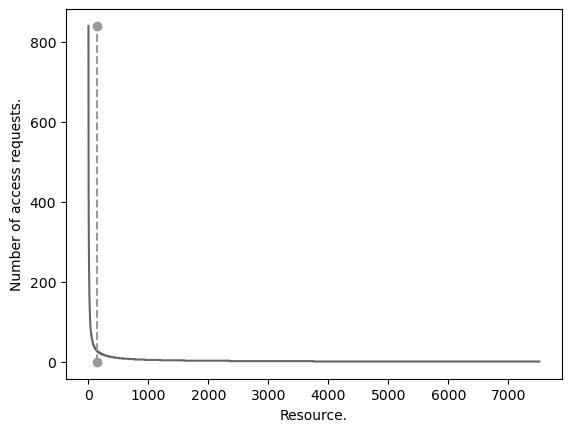

In [10]:
###### Tarea 4: recursos más frecuentes
res_to_freq = (df_data.RID.value_counts()).to_dict()
res_to_freq_lists = res_to_freq.items()
x_list, y_list = zip(*res_to_freq_lists)
#plt.figure(figsize=(20,15))
plt.plot(y_list, color='0.40', linestyle='-')
# plt.plot(141,8, marker="o", color="red")
plt.ylabel('Number of access requests.')
plt.xlabel('Resource.')
n_corte_recursos = 150
x1, y1 = [n_corte_recursos, n_corte_recursos] , [0, max(y_list)]
plt.plot(x1, y1, marker = 'o', linestyle='--', color="0.6")
#plt.text(n_corte_recursos+100, 5, '{}'.format(n_corte_recursos) , ha='left', va= 'top')
plt.savefig('frec-res-amz-corte.png')
plt.show()

In [1]:
###### Tarea 4: recursos más frecuentes
res_to_freq = (df_data[["type", "author", "patient", "topic", "treatingteam"]].value_counts()).to_dict()
res_to_freq_lists = res_to_freq.items()
x_list, y_list = zip(*res_to_freq_lists)
#plt.figure(figsize=(20,15))
plt.plot(y_list, color='0.40', linestyle='-')
# plt.plot(141,8, marker="o", color="red")
plt.ylabel('Number of access requests.', fontsize=16)
plt.xlabel('Resource.', fontsize=16)
n_corte_recursos = 211
x1, y1 = [n_corte_recursos, n_corte_recursos] , [0, max(y_list)]
plt.plot(x1, y1, marker = 'o', linestyle='--', color="0.6")
#plt.text(n_corte_recursos+100, 5, '{}'.format(n_corte_recursos) , ha='left', va= 'top')
plt.savefig('frec-res-hc-corte.png')
plt.show()

NameError: name 'df_data' is not defined

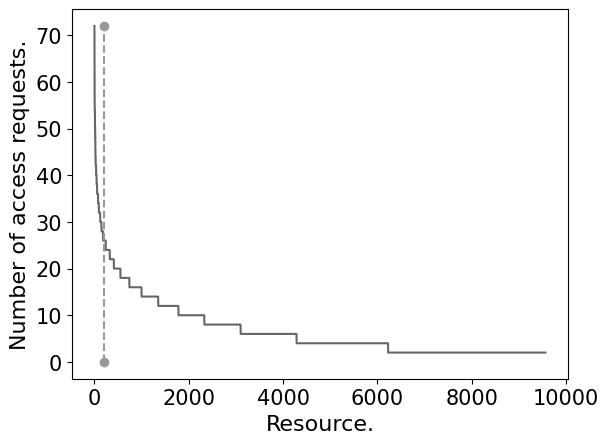

In [21]:
FILE_NAME = "/Users/ddiaz/Documents/code/phd-thesis-lab/12-third_year/00-Data/01-AMZ/01-DistributionsCSV/AMZ-MOD.csv"
df = pd.read_csv(FILE_NAME)
df_data = pd.read_csv(FILE_NAME)
#df_data = df_data[df_data.columns[1:]]
df_data
df_pos = df_data[df_data.ACTION == "1"]
df_pos
###### Tarea 4: recursos más frecuentes
res_to_freq = (df_data.uname.value_counts()).to_dict()
res_to_freq_lists = res_to_freq.items()
x_list, y_list = zip(*res_to_freq_lists)
#plt.figure(figsize=(20,15))
plt.plot(y_list, color='0.40', linestyle='-')
# plt.plot(141,8, marker="o", color="red")
plt.ylabel('Number of access requests.', fontsize=16)
plt.xlabel('Resource.', fontsize=16)
n_corte_recursos = 211
x1, y1 = [n_corte_recursos, n_corte_recursos] , [0, max(y_list)]
plt.plot(x1, y1, marker = 'o', linestyle='--', color="0.6")
#plt.text(n_corte_recursos+100, 5, '{}'.format(n_corte_recursos) , ha='left', va= 'top')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('frec-res-hc-corte.png')
plt.show()